<a href="https://colab.research.google.com/github/ColocadoJoyce/CCMARCL_EXERCISES_COM221ML/blob/main/Exercise2_Colocado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Exercise 2
Machine Learning pipeline

1. Import the necessary libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

2. Load the dataset

In [4]:
dataset = pd.read_csv("iris.csv")

3. Visualize the dataset

In [5]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


dataset.value_counts()

In [13]:
dataset.drop(columns = 'Id', inplace = True)
#remove the whole 'Id" column

In [14]:
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
dataset.info()
#display the info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [18]:
dataset['Species'].value_counts()
#Specify the column

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


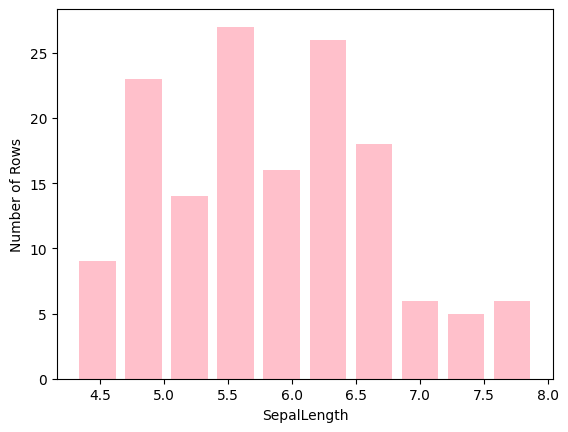

In [49]:
plt.hist([dataset['SepalLengthCm']], rwidth = 0.8, color = "pink")
plt.xlabel("SepalLength")
plt.ylabel('Number of Rows')

plt.show()

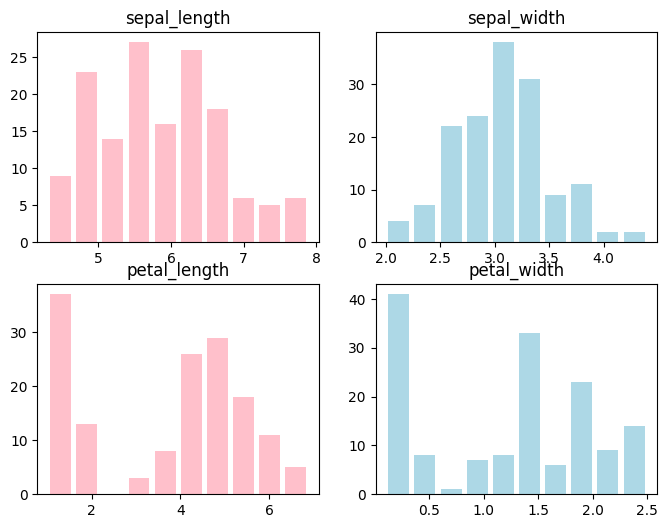

In [48]:
fg, ax = plt.subplots(2,2, figsize =(8,6))



ax[0,0].hist(dataset["SepalLengthCm"], rwidth = 0.8, color = "pink")
ax[0,1].hist(dataset["SepalWidthCm"], rwidth = 0.8, color = "lightblue")
ax[1,0].hist(dataset["PetalLengthCm"], rwidth = 0.8, color = "pink")
ax[1,1].hist(dataset["PetalWidthCm"], rwidth = 0.8, color = "lightblue")

ax[0,0].set_title("sepal_length")
ax[0,1].set_title("sepal_width")
ax[1,0].set_title("petal_length")
ax[1,1].set_title("petal_width")


plt.show()


In [56]:
colors = {'Iris-setosa': 'lightgreen',
          'Iris-virginica': 'lightblue',
          'Iris-versicolor': 'pink'}


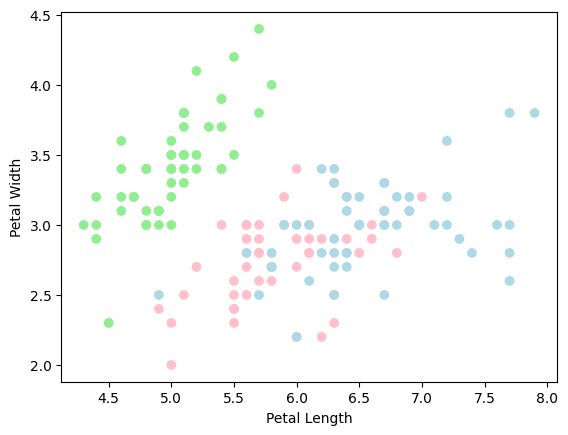

In [57]:
plt.scatter(dataset["SepalLengthCm"],
            dataset["SepalWidthCm"],
            c = df['Species'].map(colors))
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

4. Split the dataset into a training set and a testing test

In [68]:
#Array of features
X = dataset.drop(columns = ["Species"]).values

#Array of Labels
y = dataset["Species"].values

In [63]:
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [75]:
print(y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [64]:
X.shape

(150, 4)

In [69]:
y.shape

(150,)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 5)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(120, 4)
(120,)
(30, 4)
(30,)


In [76]:
print(X_train)

[[5.1 3.4 1.5 0.2]
 [5.5 2.3 4.  1.3]
 [5.7 2.6 3.5 1. ]
 [5.4 3.7 1.5 0.2]
 [7.  3.2 4.7 1.4]
 [5.  3.3 1.4 0.2]
 [5.  3.5 1.6 0.6]
 [7.7 3.  6.1 2.3]
 [5.  3.5 1.3 0.3]
 [6.4 3.2 5.3 2.3]
 [5.8 2.7 5.1 1.9]
 [5.6 2.5 3.9 1.1]
 [5.1 3.5 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [6.5 2.8 4.6 1.5]
 [6.2 2.8 4.8 1.8]
 [5.9 3.  4.2 1.5]
 [6.7 3.3 5.7 2.1]
 [7.7 3.8 6.7 2.2]
 [5.4 3.4 1.7 0.2]
 [6.3 2.5 5.  1.9]
 [5.  3.2 1.2 0.2]
 [4.6 3.4 1.4 0.3]
 [5.7 4.4 1.5 0.4]
 [5.2 3.4 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [6.3 3.3 4.7 1.6]
 [5.5 2.4 3.7 1. ]
 [5.1 2.5 3.  1.1]
 [5.9 3.  5.1 1.8]
 [5.  2.  3.5 1. ]
 [6.5 3.  5.2 2. ]
 [6.5 3.  5.8 2.2]
 [6.9 3.1 4.9 1.5]
 [4.6 3.6 1.  0.2]
 [6.6 3.  4.4 1.4]
 [4.9 3.1 1.5 0.1]
 [6.7 3.  5.  1.7]
 [6.7 3.  5.2 2.3]
 [5.6 2.9 3.6 1.3]
 [6.3 3.4 5.6 2.4]
 [5.6 2.7 4.2 1.3]
 [6.1 3.  4.9 1.8]
 [6.3 2.3 4.4 1.3]
 [5.8 2.6 4.  1.2]
 [5.7 3.  4.2 1.2]
 [6.9 3.1 5.4 2.1]
 [6.8 2.8 4.8 1.4]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 5.1 1.9]
 [4.3 3.  1.1 0.1]
 [4.8 3.4 1.9 0.2]
 [5.2 2.7 3.

5. Train the model

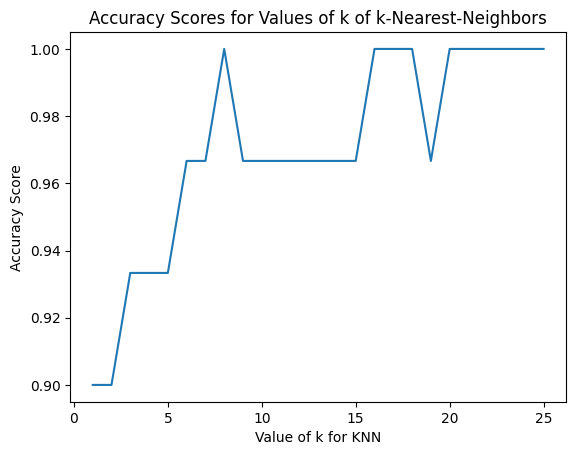

In [87]:
#experimenting wih different n values
k_range = list(range(1,26))
scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors = k)

    #train the model
    knn.fit(X_train, y_train)

    #test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [91]:


    knn = KNeighborsClassifier(n_neighbors = 13)

    #train the model
    knn.fit(X_train, y_train)

    #test the model
    y_pred = knn.predict(X_test)
    metrics.accuracy_score(y_test, y_pred)


0.9666666666666667

In [90]:
#make prediction for an example of an out-of-sample observation
knn.predict([[6,3,4,2]])

array(['Iris-versicolor'], dtype=object)